In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
from scipy import stats
from sklearn.linear_model import LinearRegression

###### Чуть-чуть справки

Пусть необходимо восстановить целевой вектор значений по известным значениям предикторов. Предполагается, что $y_i = f(w, x_i) + \varepsilon_i$ и $f$ - линейная функция. Тогда такая задача называется задачей линейной (множественной) регрессии.

Определим модель, следующим образом:
$$y_i = w_1 + wx_i + \varepsilon_i$$
$w = (w_1, w)^T$ - вектор параметров

В матричном виде, можно записать так:
$$y = WX + E$$

Необходимо найти матрицу параметров $W$. Задача имеет следующее решение:

$$W = (X^T X)^{-1} X^Ty$$

При этом, в $X$ содержится столбец констант, чтобы найти значение свободного члена линейной модели.

###### Перейдем к решению задания.

Создадим функцию, которая находит уравнение линейной регрессии

In [2]:
def build_linear_regression_model(X, y):
    '''
    input: numpy.ndarray X - matrix of size (n x k), where n - number of samples and k - number of features
           numpy.ndarray y - target vector os size (n)
    return:
            numpy.ndarray weights: vector of size (k), coefficients
            numpy.ndarray intercept
    '''
    # add intercept to X
    X = np.c_[X, np.ones(X.shape[0])]
    W_inv = np.linalg.inv(X.T @ X)
    model = W_inv @ X.T @ y
    return model[:X.shape[1]-1], model[-1]

Считаем данные

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/zhukpm/da_spring2020/master/data/lw6/projects/1032172712/task.csv')

In [4]:
data.head()

,x1,x2,x3,y
0,-169.287181,-31.308543,29.748219,-1791.793095
1,-72.799979,-15.269879,50.400149,-1340.650872
2,-7.530038,-24.581447,32.318579,-709.772336
3,-35.632592,3.536118,28.394709,-107.073871
4,-137.006100,10.416910,18.953056,-1205.994278


In [5]:
X = data.iloc[:, :3].values
y = data.y.values

Построим по данным модель регрессии

In [6]:
weights, intercept = build_linear_regression_model(X, y)
weights, intercept

(array([ 8.6012258 , 15.26232043, -9.09064899]), -142.6511717454586)

Проверим, что встроенная функция находит такие же коэффициенты и свободный член

In [7]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([ 8.6012258 , 15.26232043, -9.09064899]), -142.65117174546117)

Построим предсказания с помощью нашей модели

In [8]:
y_pred = X @ weights + intercept
y_pred[:3] # first 3 preds

array([-2347.00007619, -1460.04407135,  -876.38551516])

Убедимся, что они совпадают со встроенной моделью

In [9]:
y_pred_lr = lr.predict(X)
y_pred_lr[:3] # first 3 preds

array([-2347.00007619, -1460.04407135,  -876.38551516])

Построим графики совместных распределений предикторов и целевой переменной с нанесением уравнения нашей модели

In [10]:
x1 = X[:, 0]
x2 = X[:, 1]
x3 = X[:, 2]

x1_argmin = x1.argmin()
x1_argmax = x1.argmax()
x2_argmin = x2.argmin()
x2_argmax = x2.argmax()
x3_argmin = x3.argmin()
x3_argmax = x3.argmax()

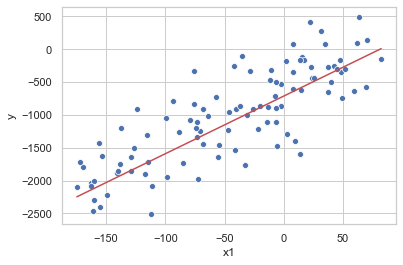

In [11]:
sns.scatterplot(x1, y)

minimax = np.array([x1.min(), x1.max()])
plt.plot(minimax, y_pred_lr[[x1_argmin, x1_argmax]], 'r-')
plt.xlabel('x1')
plt.ylabel('y')

plt.show()

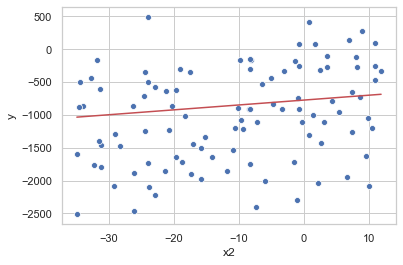

In [12]:
sns.scatterplot(x2, y)
minimax = np.array([x2.min(), x2.max()])
plt.plot(minimax, y_pred_lr[[x2_argmin, x2_argmax]], 'r-')
plt.xlabel('x2')
plt.ylabel('y')

plt.show()

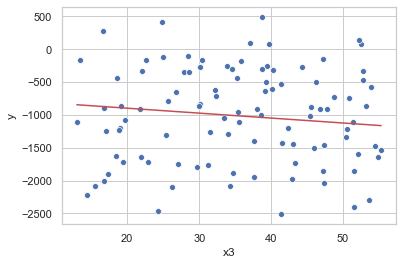

In [13]:
sns.scatterplot(x3, y)

minimax = np.array([x3.min(), x3.max()])
plt.plot(minimax, y_pred_lr[[x3_argmin, x3_argmax]], 'r-')
plt.xlabel('x3')
plt.ylabel('y')

plt.show()

Построим график распределения остатков модели

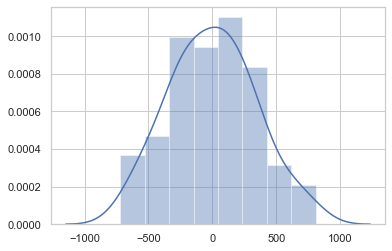

In [14]:
dy = y - y_pred # остатки
sns.distplot(dy)
plt.show()

Проверим распределение остатков на нормальности. Примем уровень значимости $\alpha = 0.05$ и сделаем вывод.

In [15]:
_, p_value = stats.shapiro(dy)
print('p_value =', p_value)

p_value = 0.7448436617851257


Посколько p_value > 0.05 $\Rightarrow$ остаемся в рамках гипотезы $H_0$: остатки модели распределены нормально

Проверим отсутствие систематической ошибки с помощью критерия Стьюдента. Пример уровень значимости $\alpha = 0.05$

$H_0$: ошибка отсутствует

$H_1$ ошибка присутствует.

In [16]:
_, p_value = stats.ttest_1samp(dy, 0)
print('p_value =', p_value)

p_value = 0.9999999999999991


Посколько p_value > 0.05 $\Rightarrow$ остаемся в рамках гипотезы $H_0$: систематическая ошибка отсутствует.

Построим графики совместных распределений предикторов и эмпирических значений целевой переменной против остатков.

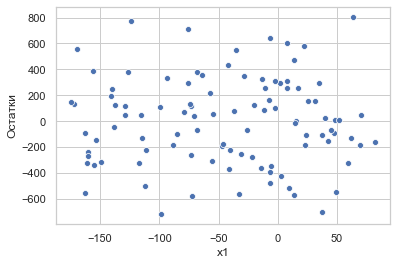

In [17]:
sns.scatterplot(x1, dy)
plt.xlabel('x1')
plt.ylabel('Остатки')
plt.show()

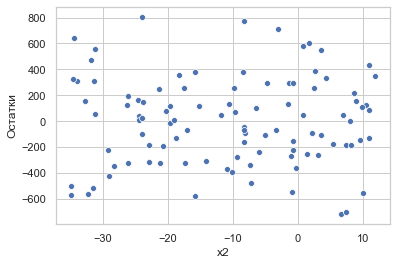

In [18]:
sns.scatterplot(x2, dy)
plt.xlabel('x2')
plt.ylabel('Остатки')
plt.show()

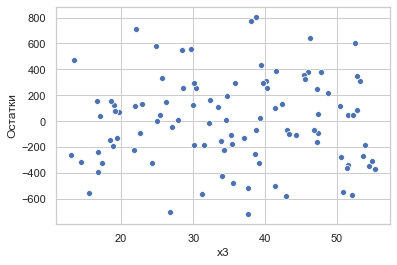

In [19]:
sns.scatterplot(x3, dy)
plt.xlabel('x3')
plt.ylabel('Остатки')
plt.show()

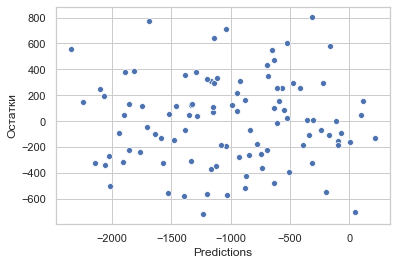

In [20]:
sns.scatterplot(y_pred, dy)
plt.xlabel('Predictions')
plt.ylabel('Остатки')
plt.show()

Проверим отсутствие линейной зависимости между всеми предикторами и остатками (с помощью критерия Спирмена) и сделаем выводы.

Примем уровень значимости $\alpha = 0.05$, а также введем гипотезы:

$H_0$: предиктор и остатки независимы

$H_1$: предиктор и остатки зависимы

In [21]:
def spearman_test(X, Y):
    '''
    input:
            numpy.ndarray X: first sample of size n
            numpy.ndarray Y: second sample of sine n
    return:
            T = spearman's statistic
            p_value
    '''
    R = stats.rankdata(X)
    S = stats.rankdata(Y)
    n = X.size
    r = np.sum((R - R.mean()) * (S - S.mean())) / np.sqrt(np.sum((R - R.mean()) ** 2) * np.sum((S - S.mean()) ** 2))
    if (n > 50):
        T = np.sqrt(n - 1) * r # нормальная апроксимация
        p_value = 2 * min(stats.norm.cdf(T), 1 - stats.norm.cdf(T))
    else:
        T = np.sqrt(n - 2) * r / np.sqrt(1 - r ** 2) # апроксимация стьюдента
        p_value = 2 * min(stats.t.cdf(T, n - 2), 1 - stats.t.cdf(T, n - 2))
    return T, p_value

In [22]:
print('p_value for dependence of x1 and dy =', spearman_test(x1, dy)[1])
print('p_value for dependence of x2 and dy =', spearman_test(x2, dy)[1])
print('p_value for dependence of x3 and dy =', spearman_test(x3, dy)[1])

p_value for dependence of x1 and dy = 0.8710863249796972
p_value for dependence of x2 and dy = 0.8710863249796972
p_value for dependence of x3 and dy = 0.990948998701372


Поскольку для всех трех предикторов получены p_values > 0.05, то мы остаемся в рамках основной гипотезы $H_0$, т.е. считаем, что предикторы и остатки независимы

Проверим отсутствие линейной зависимости между эмпирическими значениями и остатками. Уровень значимости и гипотезы аналогичны предикторам

In [23]:
print('p_value for dependence of y_pred and dy =', spearman_test(y_pred, dy)[1])

p_value for dependence of y_pred and dy = 0.9311061943934493


Поскольку p_value > 0.05, то остаемся в рамках нулевой гипотезы $H_0$, то есть эмпирические значения и остатки независимы.

Вычислим коэффициент детерминации модели по следующей формуле:
$$
R^2 = 1 - \frac{\sum_{i=1}^n (\hat\varepsilon_i)^2}{\sum_{i=1}^n (y_i - \overline y)^2}
$$

где, $R^2$ - коэффициент детерминации, $\hat\varepsilon_i$ - остаток $i$-го наблюдения, $y_i$ - значение целевой переменной для $i$-го наблюдения, $\overline y$ - выборочное среднее целевой переменной, $n$ - число наблюдений

In [24]:
R_2 = 1 - np.sum(dy * dy) / np.sum((y - y.mean()) * (y - y.mean()))
print('Коэффициент детерменации =', R_2)
# R_2 == lr.score(X, y) # проверка, что сошлось

Коэффициент детерменации = 0.7787246702610732


Вычислим несмещенный коэффициент детерминации модели по следующей формуле:
$$
\tilde R^2 = 1 - \frac{n-1}{n-p} \frac{\sum_{i=1}^n (\hat\varepsilon_i)^2}{\sum_{i=1}^n (y_i - \overline y)^2}
$$

Здесь $p$ - количество предикторов (с учетом константы, т.е. если $p = 1$, то модель - константа, если $p = 2$, то модель - линейная функция одной переменной, если $p > 2$, то модель линейная функция многих переменных

В нашем случае $p = 4$, т.к. три предиктора + константа

In [25]:
n = y_pred.size
p = 4
R_2_super = 1 - (n - 1) / (n - p) * np.sum(dy * dy) / np.sum((y - y.mean()) * (y - y.mean()))
print('Несмещенный коэффициент детерменации =', R_2_super)

Несмещенный коэффициент детерменации = 0.7718098162067317
